Going to be making predictions on the data using a random forest and coupling this with unsupervised learning to make a nice good old semi-supervised model!

This is going to be different in that I'm utilizing the additional features!

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [118]:
#df = pd.read_csv('Train_hcp_additional_features.csv') # Check the additional features
df = pd.read_csv('Train_hcp_additional_features.csv') # Check the original features
df.shape

(62, 44)

In [119]:
from google.colab.data_table import DataTable
DataTable.max_columns = 45

In [120]:
df.describe()

Unnamed: 0       r1Cu       r1Co       r1Ni       r1Zn       r1Mg  \
count   62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean    30.500000   0.467742   0.645161   0.500000   0.709677   0.677419   
std     18.041619   0.783388   0.993368   0.882433   1.014438   0.988030   
min      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     15.250000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     30.500000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     45.750000   1.000000   1.000000   1.000000   1.000000   1.000000   
max     61.000000   3.000000   3.000000   3.000000   3.000000   3.000000   

            r2Cu       r2Co       r2Ni       r2Zn  ...  r3 atomic radius  \
count  62.000000  62.000000  62.000000  62.000000  ...         62.000000   
mean    1.435484   0.403226   0.467742   0.354839  ...        135.241935   
std     1.139758   0.756603   0.783388   0.748699  ...          1.905002   
min     0.000000   0.000000   0.000000   0.000000  ...        135.000000   
25%     0.000000   0.000000   0.000000   0.000000  ...        135.000000   
50%     1.000000   0.000000   0.000000   0.000000  ...        135.000000   
75%     2.000000   1.000000   1.000000   0.000000  ...        135.000000   
max     3.000000   3.000000   3.000000   3.000000  ...        150.000000   

       r3 metallic radius  r3 dipole polarizability  r3 lattice constant  \
count           62.000000                 62.000000            62.000000   
mean           118.258065                 46.949516             3.569032   
std              2.367370                  3.476787             0.188894   
min            115.000000                 38.670000             2.510000   
25%            118.000000                 46.500000             3.610000   
50%            118.000000                 46.500000             3.610000   
75%            118.000000                 46.500000             3.610000   
max            136.000000                 71.200000             3.610000   

       r3 VDW radius  r3 ionization energy  r3 electronegativity pauling  \
count      62.000000             62.000000                     62.000000   
mean      195.790323              7.753086                      1.886290   
std         3.052207              0.213296                      0.080922   
min       173.000000              7.639877                      1.310000   
25%       196.000000              7.726380                      1.900000   
50%       196.000000              7.726380                      1.900000   
75%       196.000000              7.726380                      1.900000   
max       201.000000              9.394199                      1.910000   

       r3 electronegativity allen  r3 electronegativity ghosh    delta_E  
count                   62.000000                   62.000000  62.000000  
mean                    10.882435                    0.150568  -0.286929  
std                      0.463375                    0.003933   0.338224  
min                      7.646000                    0.121644  -0.762244  
25%                     10.960000                    0.151172  -0.572277  
50%                     10.960000                    0.151172  -0.320498  
75%                     10.960000                    0.151172  -0.070290  
max                     11.130000                    0.155152   0.466403  

[8 rows x 44 columns]

In [121]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
X = df.drop(['delta_E'], axis=1)
y = df['delta_E']

In [122]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X)
X_scaled = scalar.transform(X)


In [123]:
X_scaled

array([[ 0.6849776 , -0.6547706 ,  1.71372171, ...,  0.17080226,
         0.16875677,  0.15480639],
       [ 0.6849776 ,  1.37501827, -0.57124057, ...,  0.17080226,
         0.16875677,  0.15480639],
       [ 0.6849776 , -0.6547706 , -0.57124057, ...,  0.17080226,
         0.16875677,  0.15480639],
       ...,
       [-0.60195001, -0.6547706 , -0.57124057, ...,  0.17080226,
         0.16875677,  0.15480639],
       [-0.60195001, -0.6547706 , -0.57124057, ...,  0.17080226,
         0.16875677,  0.15480639],
       [-0.60195001, -0.6547706 , -0.57124057, ...,  0.17080226,
         0.16875677,  0.15480639]])

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
# Random Forest model
# Running the model here
RF_reg = RandomForestRegressor(n_estimators=100, max_depth=4)
RF_reg.fit(X_train, y_train)
predictions_RF = RF_reg.predict(X_test)
predictions2_RF = RF_reg.predict(X_train)

In [127]:
RMSE_test = mean_squared_error(y_test, predictions_RF, squared=False)
RMSE_train = mean_squared_error(y_train, predictions2_RF, squared=False)
Score_test = RF_reg.score(X_test, y_test)
Score_train = RF_reg.score(X_train, y_train)

In [128]:
print('RMSE test',RMSE_test)
print('RMSE train',RMSE_train)
print('Test score',Score_test)
print('Train score',Score_train)

RMSE test 0.16021261799207404
RMSE train 0.06127284476713666
Test score 0.8463143057870534
Train score 0.9617214632348234


Okay lets make that new CSV file!

In [129]:
# Load the trained model

new_data = pd.read_csv('generated_train_hcp_additional_features.csv') #Check the additional features
#new_data = pd.read_csv('generated_train.csv') #Check the original features
new_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [130]:
scalar.fit(new_data)
new_data = pd.DataFrame(scalar.transform(new_data))

In [131]:
predictions = RF_reg.predict(new_data)

In [132]:
predictions_df = pd.DataFrame(predictions, columns=['PredictedTarget'])

# Concatenate the predictions dataframe with the original new_data dataframe
new_data_with_predictions = pd.concat([new_data, predictions_df], axis=1)

In [133]:
df.describe()

r1Cu       r1Co       r1Ni       r1Zn       r1Mg       r2Cu  \
count  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean    0.467742   0.645161   0.500000   0.709677   0.677419   1.435484   
std     0.783388   0.993368   0.882433   1.014438   0.988030   1.139758   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   1.000000   
75%     1.000000   1.000000   1.000000   1.000000   1.000000   2.000000   
max     3.000000   3.000000   3.000000   3.000000   3.000000   3.000000   

            r2Co       r2Ni       r2Zn       r2Mg  ...  r3 atomic radius  \
count  62.000000  62.000000  62.000000  62.000000  ...         62.000000   
mean    0.403226   0.467742   0.354839   0.338710  ...        135.241935   
std     0.756603   0.783388   0.748699   0.745336  ...          1.905002   
min     0.000000   0.000000   0.000000   0.000000  ...        135.000000   
25%     0.000000   0.000000   0.000000   0.000000  ...        135.000000   
50%     0.000000   0.000000   0.000000   0.000000  ...        135.000000   
75%     1.000000   1.000000   0.000000   0.000000  ...        135.000000   
max     3.000000   3.000000   3.000000   3.000000  ...        150.000000   

       r3 metallic radius  r3 dipole polarizability  r3 lattice constant  \
count           62.000000                 62.000000            62.000000   
mean           118.258065                 46.949516             3.569032   
std              2.367370                  3.476787             0.188894   
min            115.000000                 38.670000             2.510000   
25%            118.000000                 46.500000             3.610000   
50%            118.000000                 46.500000             3.610000   
75%            118.000000                 46.500000             3.610000   
max            136.000000                 71.200000             3.610000   

       r3 VDW radius  r3 ionization energy  r3 electronegativity pauling  \
count      62.000000             62.000000                     62.000000   
mean      195.790323              7.753086                      1.886290   
std         3.052207              0.213296                      0.080922   
min       173.000000              7.639877                      1.310000   
25%       196.000000              7.726380                      1.900000   
50%       196.000000              7.726380                      1.900000   
75%       196.000000              7.726380                      1.900000   
max       201.000000              9.394199                      1.910000   

       r3 electronegativity allen  r3 electronegativity ghosh    delta_E  
count                   62.000000                   62.000000  62.000000  
mean                    10.882435                    0.150568  -0.286929  
std                      0.463375                    0.003933   0.338224  
min                      7.646000                    0.121644  -0.762244  
25%                     10.960000                    0.151172  -0.572277  
50%                     10.960000                    0.151172  -0.320498  
75%                     10.960000                    0.151172  -0.070290  
max                     11.130000                    0.155152   0.466403  

[8 rows x 43 columns]

In [134]:
new_data_with_predictions.describe()

0             1            2             3            4  \
count  6125.000000  6.125000e+03  6125.000000  6.125000e+03  6125.000000   
mean      0.000000  3.712223e-17     0.000000  1.856112e-17     0.000000   
std       1.000082  1.000082e+00     1.000082  1.000082e+00     1.000082   
min      -0.750000 -7.500000e-01    -0.750000 -7.500000e-01    -0.750000   
25%      -0.750000 -7.500000e-01    -0.750000 -7.500000e-01    -0.750000   
50%      -0.750000 -7.500000e-01    -0.750000 -7.500000e-01    -0.750000   
75%       0.500000  5.000000e-01     0.500000  5.000000e-01     0.500000   
max       3.000000  3.000000e+00     3.000000  3.000000e+00     3.000000   

                  5             6             7             8             9  \
count  6.125000e+03  6.125000e+03  6.125000e+03  6.125000e+03  6.125000e+03   
mean   2.494150e-17  1.116567e-17  1.769106e-17  2.900174e-18  1.682101e-17   
std    1.000082e+00  1.000082e+00  1.000082e+00  1.000082e+00  1.000082e+00   
min   -7.500000e-01 -7.500000e-01 -7.500000e-01 -7.500000e-01 -7.500000e-01   
25%   -7.500000e-01 -7.500000e-01 -7.500000e-01 -7.500000e-01 -7.500000e-01   
50%   -7.500000e-01 -7.500000e-01 -7.500000e-01 -7.500000e-01 -7.500000e-01   
75%    5.000000e-01  5.000000e-01  5.000000e-01  5.000000e-01  5.000000e-01   
max    3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   

       ...           33            34            35            36  \
count  ...  6125.000000  6.125000e+03  6.125000e+03  6.125000e+03   
mean   ...     0.000000 -3.629750e-16  2.588406e-16  1.190377e-15   
std    ...     1.000082  1.000082e+00  1.000082e+00  1.000082e+00   
min    ...    -0.500000 -8.074450e-01 -1.229206e+00 -1.330233e+00   
25%    ...    -0.500000 -6.772119e-01 -5.111604e-01 -9.931807e-01   
50%    ...    -0.500000 -4.167458e-01 -2.818994e-01  2.426776e-01   
75%    ...    -0.500000 -2.604661e-02  2.683271e-01  9.392523e-01   
max    ...     2.000000  1.927449e+00  1.753939e+00  1.141484e+00   

                 37            38            39            40            41  \
count  6.125000e+03  6.125000e+03  6.125000e+03  6.125000e+03  6.125000e+03   
mean  -5.405200e-16  3.951488e-18 -1.590202e-16 -3.851613e-16  4.508865e-16   
std    1.000082e+00  1.000082e+00  1.000082e+00  1.000082e+00  1.000082e+00   
min   -1.968100e+00 -6.197164e-01 -1.818881e+00 -1.768479e+00 -1.881542e+00   
25%    2.508363e-01 -6.102826e-01 -3.464535e-01 -4.535101e-01 -3.806097e-02   
50%    3.473118e-01 -4.913658e-01  6.496003e-01  6.479361e-01  3.009276e-01   
75%    6.367382e-01 -2.619303e-01  7.362136e-01  7.231201e-01  6.394294e-01   
max    7.332137e-01  1.983295e+00  7.795203e-01  8.509330e-01  9.792461e-01   

       PredictedTarget  
count      6125.000000  
mean         -0.301371  
std           0.252387  
min          -0.726471  
25%          -0.556458  
50%          -0.278573  
75%          -0.127571  
max           0.385586  

[8 rows x 43 columns]

Lets continue on and see about making a unsupervised model out of this

In [135]:
#Alright, I believe that I should do a new split on the new CSV data
X = new_data_with_predictions.drop(['PredictedTarget'], axis=1)
y = new_data_with_predictions['PredictedTarget']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [137]:
#First we gotta reduce the dimensionality of the data!
#Using tSNE here
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, n_jobs=-1)
X_tsne = tsne.fit_transform(X)

In [171]:
#Maybe we can also check out PCA?
from sklearn.decomposition import PCA
pca = PCA(6)
X_pca = pca.fit_transform(X)

In [172]:
pca.explained_variance_ratio_

array([0.17916879, 0.17916879, 0.17916879, 0.07690723, 0.07690723,
       0.07690723])

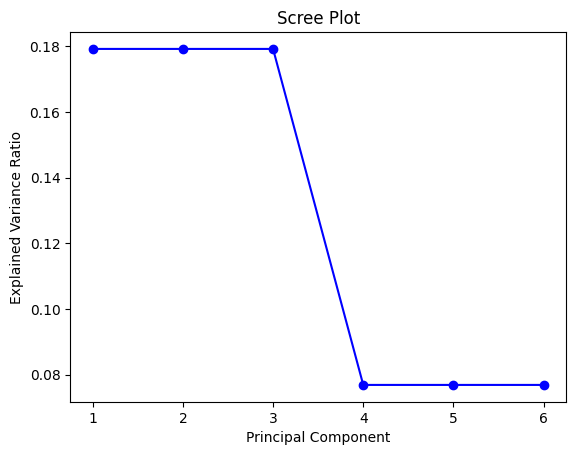

In [173]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()

In [174]:
# Pulling the components out of the PCA
# Access the loadings (eigenvectors) of each principal component
loadings = pca.components_
container = []
# Print the loadings
for i, component in enumerate(loadings):
    contain_for_sorting = []
    print(f"Principal Component {i+1} Loadings:")
    for j, feature in enumerate(component):
        print(f"Feature {j+1}: {feature}")
        contain_for_sorting.append(feature)
    print()
    container.append(contain_for_sorting)

Principal Component 1 Loadings:
Feature 1: -0.0657918213640942
Feature 2: -0.05487031464609044
Feature 3: -0.06734061016928436
Feature 4: -0.06621288263558966
Feature 5: 0.2542156288150586
Feature 6: -0.03296701052945615
Feature 7: -0.02749445452621936
Feature 8: -0.033743078675769436
Feature 9: -0.03317799619732695
Feature 10: 0.12738253992877188
Feature 11: -0.058942171496535266
Feature 12: -0.04915771335833174
Feature 13: -0.060329714408020194
Feature 14: -0.05931939567365134
Feature 15: 0.22774899493653852
Feature 16: 0.2542156288150586
Feature 17: 0.24426540448366235
Feature 18: 0.2260632624491897
Feature 19: 0.024837595742932234
Feature 20: -0.2494796684953002
Feature 21: -0.07921236644332663
Feature 22: -0.23040888108628746
Feature 23: -0.22399078752013374
Feature 24: -0.24136063697722954
Feature 25: 0.12738253992877188
Feature 26: 0.12239667476343073
Feature 27: 0.11327593307141547
Feature 28: 0.01244563934249879
Feature 29: -0.12500944171547687
Feature 30: -0.03969178637187658

In [175]:
X_tsne.shape

(6125, 3)

In [143]:
tsne_df = pd.DataFrame(X_tsne)

In [176]:
X_pca.shape

(6125, 6)

In [177]:
pca_df = pd.DataFrame(X_pca)

In [178]:
pca_df

0         1         2         3         4         5
0     4.087222  3.386880  4.406547 -1.015674 -0.647334  2.634999
1     8.422858 -1.303290  1.704078  0.587308 -0.043225  2.216779
2     4.255363  3.204990  4.301743  0.657130 -0.016912  2.198562
3     4.102428  3.370431  4.397069  3.554230  1.074905  1.442705
4     4.108105  3.364289  4.393531 -0.816117 -0.572127  2.582934
...        ...       ...       ...       ...       ...       ...
6120 -3.036364 -0.042376 -1.070476 -1.324194 -0.626048  1.483228
6121  1.299272 -4.732546 -3.772945  0.278788 -0.021940  1.065008
6122 -2.868224 -0.224266 -1.175281  0.348610  0.004374  1.046791
6123 -3.021159 -0.058825 -1.079954  3.245709  1.096191  0.290935
6124 -3.015481 -0.064967 -1.083493 -1.124637 -0.550842  1.431163

[6125 rows x 6 columns]

Okay now to plot these:)

In [147]:
# Enable interactive plots in Google Colab
%matplotlib inline

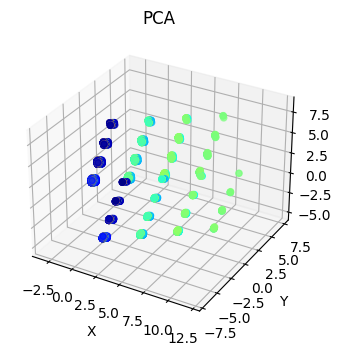

In [179]:
# Create a 3D plot

fig = plt.figure()

ax2 = fig.add_subplot(122, projection='3d')

# Plot the data points
ax2.scatter(pca_df[0], pca_df[1], pca_df[2], c=y, cmap='jet')
ax2.set_title('PCA')

# Set labels for the axes
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
#ax2.axis('off')

# Function to rotate the plot
def rotate(event):
    ax2.view_init(elev=event.ydata, azim=event.xdata*4)
    fig.canvas.draw()

# Connect the rotate function to mouse events
fig.canvas.mpl_connect('motion_notify_event', rotate)

# Adjust the layout
fig.tight_layout()

# Show the plot
plt.show()

In [186]:
# Trying to use a different package for 3D visualization!
# This is the PCA plot btw
import plotly.graph_objects as go

# Define scaling range
scale_min = y.min()
scale_max = y.max()

# Create 3D scatter plot using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=pca_df[0], y=pca_df[2], z=pca_df[3],
    mode='markers',
    marker=dict(
        #size=(y - scale_min) / (scale_max - scale_min) * 10,  # Adjust the scaling factor as needed
        color=y,
        colorscale='jet',
        opacity=0.95,
        colorbar=dict(title='Predicted Delta E')
    ),
    name='Subplot 1'
))
#fig.add_trace(go.Scatter3d(
#    x=X_tsne[0], y=X_tsne[1], z=X_tsne[2],
#    mode='markers',
#    marker=dict(size=5),
#    name='Subplot 2'
#))
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
))
fig.show()

In [150]:
# Trying to use a different package for 3D visualization!
# This is the t-SNE plot btw
import plotly.graph_objects as go

# Define scaling range
scale_min = y.min()
scale_max = y.max()

# Create 3D scatter plot using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=tsne_df[0], y=tsne_df[1], z=tsne_df[2],
    mode='markers',
    marker=dict(
        size=5,   #(y - scale_min) / (scale_max - scale_min) * 5,  # Adjust the scaling factor as needed
        color=y,
        colorscale='jet',
        opacity=0.5,
        colorbar=dict(title='Predicted Delta E')
    ),
    name='Subplot 1'
))
#fig.add_trace(go.Scatter3d(
#    x=X_tsne[0], y=X_tsne[1], z=X_tsne[2],
#    mode='markers',
#    marker=dict(size=5),
#    name='Subplot 2'
#))
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
))
fig.show()

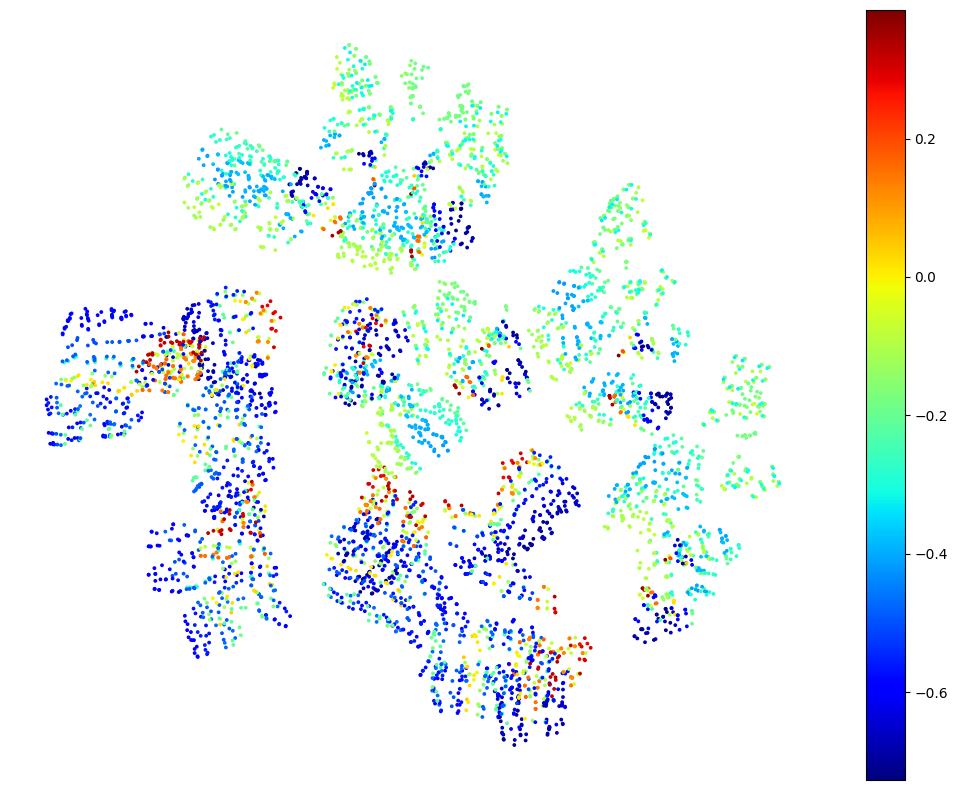

In [151]:
#t-SNE plot
plt.figure(figsize=(13,10))
plt.scatter(X_tsne[:,0],X_tsne[:,1], c=y, s=3, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

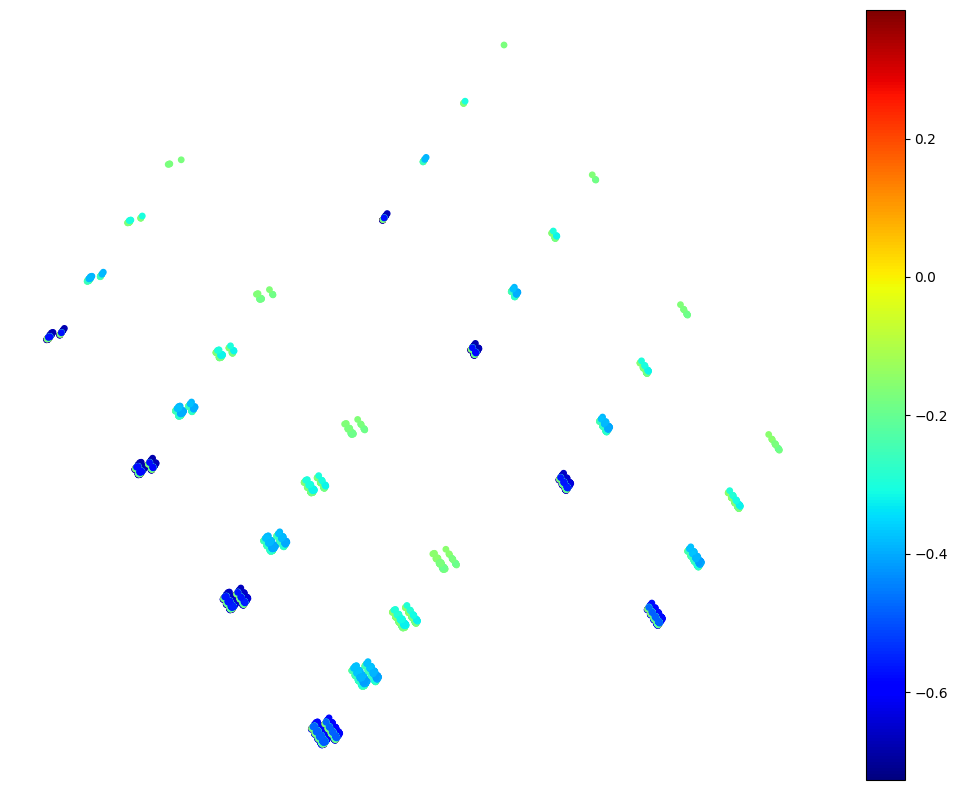

In [152]:
#PCA plot
plt.figure(figsize=(13,10))
plt.scatter(X_pca[:,0],X_pca[:,1], c=y, s=15, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

In [153]:
# Kmeans function to get a ton of different cluster information
# Changing this function to return a 2D array containing silhouette and inertias instead
from sklearn.cluster import KMeans

def run_kmeans_multiple_times(data, num_iterations):
    K_array = []


    for _ in range(num_iterations):

        if _ < 2:
          continue
        iteration = []
        kmeans = KMeans(n_clusters=(num_iterations - (num_iterations - _)))
        kmeans.fit(data)

        iteration.append(num_iterations - (num_iterations - _)) # Attaching cluster counts
        iteration.append(silhouette_score(data, kmeans.labels_)) # Attach silhouette scores
        iteration.append(kmeans.inertia_) # Attach inertia scores

        K_array.append(iteration)

    return K_array

In [154]:
pca_model = run_kmeans_multiple_times(pca_df, 50)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [155]:
tsne_model = run_kmeans_multiple_times(tsne_df, 50)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [156]:
# Graph silhouette scores
silhouette_per_pca = []
for arr in pca_model:
  silhouette_per_pca.append(arr[1])

In [157]:
# Graph silhouette scores
silhouette_per_tsne = []
for arr in tsne_model:
  silhouette_per_tsne.append(arr[1])

In [158]:
# Graph inertia scores
inertias_per_pca = []
for arr in pca_model:
  inertias_per_pca.append(arr[2])

In [159]:
# Graph inertia scores
inertias_per_tsne = []
for arr in tsne_model:
  inertias_per_tsne.append(arr[2])

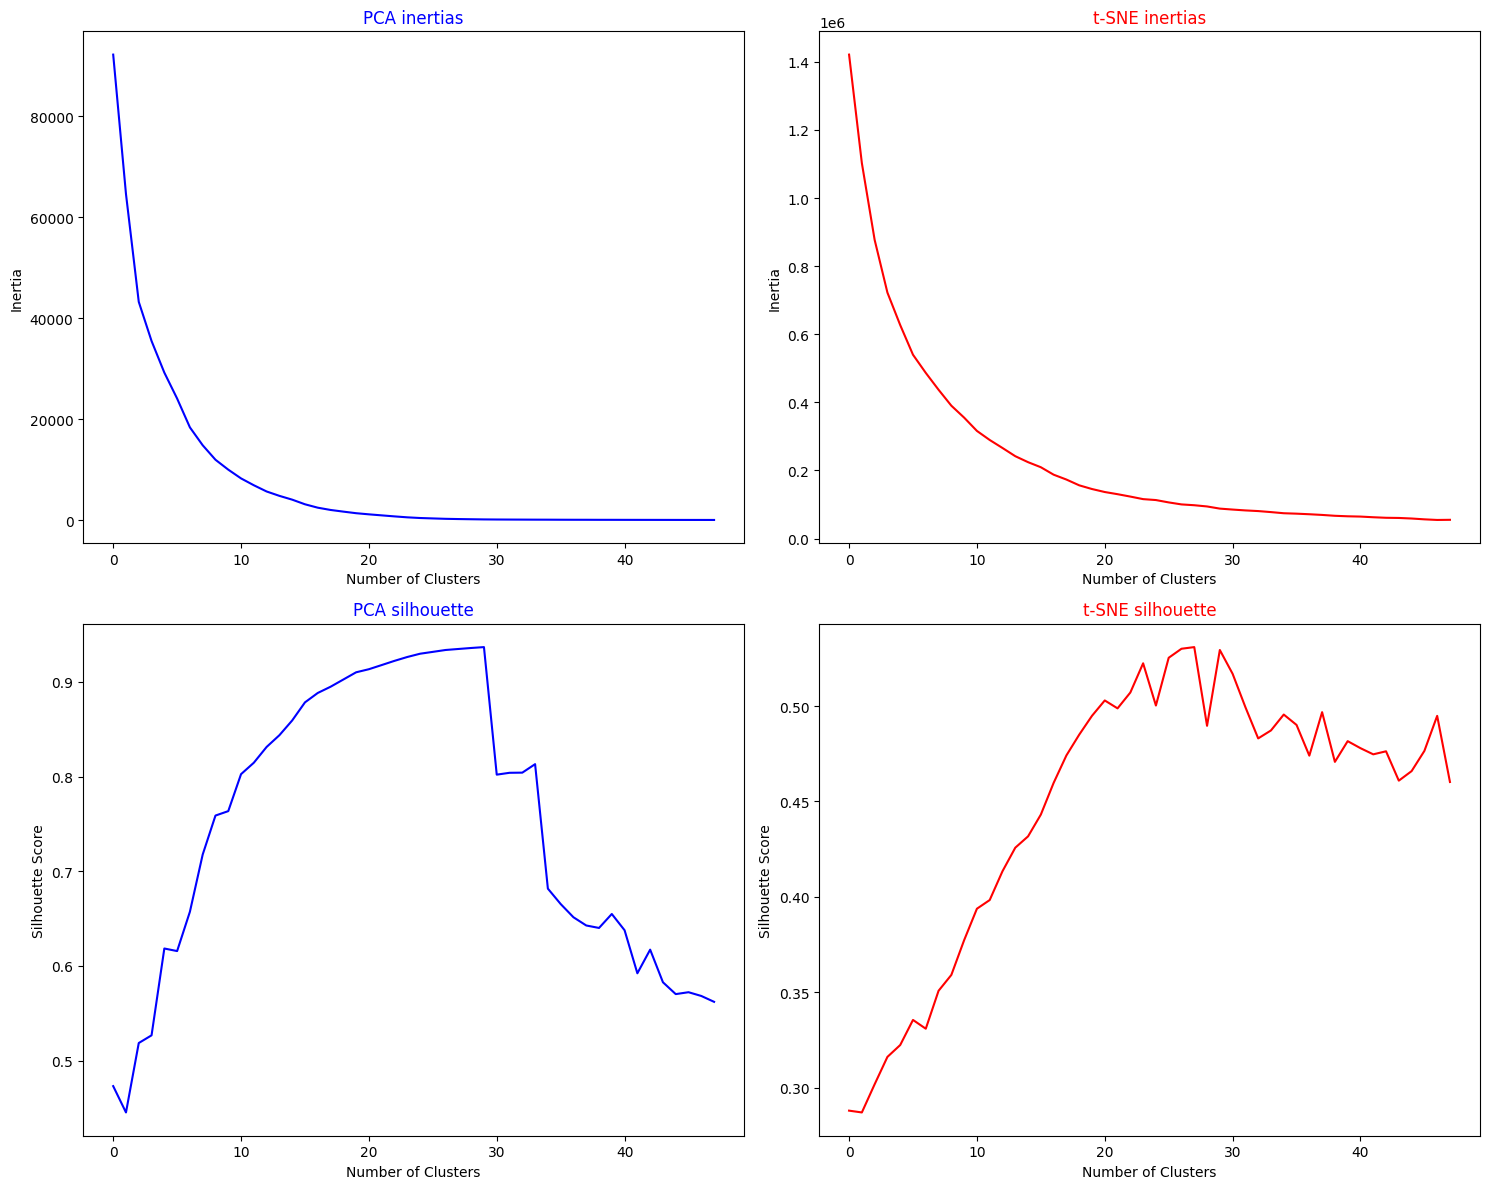

In [160]:
plt.figure(figsize=(15, 12))

# Subplot 1: PCA inertias
ax1 = plt.subplot(2, 2, 1)
ax1.plot(inertias_per_pca, color='blue')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.set_title("PCA inertias", color='blue')


# Subplot 2: t-SNE inertias
ax2 = plt.subplot(2, 2, 2)
ax2.plot(inertias_per_tsne, color='red')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Inertia')
ax2.set_title("t-SNE inertias", color='red')


# Subplot 3: PCA silhouette
ax3 = plt.subplot(2, 2, 3)
ax3.plot(silhouette_per_pca, color='blue')
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('Silhouette Score')
ax3.set_title("PCA silhouette", color='blue')


# Subplot 4: t-SNE silhouette
ax4 = plt.subplot(2, 2, 4)
ax4.plot(silhouette_per_tsne, color='red')
ax4.set_xlabel('Number of Clusters')
ax4.set_ylabel('Silhouette Score')
ax4.set_title("t-SNE silhouette", color='red')


plt.tight_layout()
plt.show()

In [161]:
num_clusters = 25
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tsne_df)
centroids = kmeans.cluster_centers_

# Create 3D scatter plot using Plotly
fig = go.Figure()

# Add scatter plot for the cluster centroids
fig.add_trace(go.Scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 2],
    mode='markers',
    marker=dict(
        size=10,
        color='black',
        symbol='cross',
    ),
    name='Cluster Centroids'
))

# Add scatter plot for the data points
fig.add_trace(go.Scatter3d(
    x=tsne_df[0],
    y=tsne_df[1],
    z=tsne_df[2],
    mode='markers',
    marker=dict(
        size=5,
        #color=clusters,
        colorscale='jet',
        opacity=0.5,
        colorbar=dict(title='Cluster')
    ),
    name='Data Points'
))

# Update the layout to include a colorbar
fig.update_layout(coloraxis_colorbar=dict(title='Cluster'))

# Set the axis titles
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
))

fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [162]:
import plotly.graph_objects as go
from sklearn.cluster import KMeans

# Run K-means clustering
num_clusters = 25  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(pca_df)
centroids = kmeans.cluster_centers_

# Create 3D scatter plot using Plotly
fig = go.Figure()

# Add scatter plot for the cluster centroids
fig.add_trace(go.Scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 2],
    mode='markers',
    marker=dict(
        size=10,
        color='black',
        symbol='cross',
    ),
    name='Cluster Centroids'
))

# Add scatter plot for the data points
fig.add_trace(go.Scatter3d(
    x=pca_df[0],
    y=pca_df[1],
    z=pca_df[2],
    mode='markers',
    marker=dict(
        size=5,
        #color=clusters,
        colorscale='jet',
        opacity=0.5,
        colorbar=dict(title='Cluster')
    ),
    name='Data Points'
))

# Update the layout to include a colorbar
fig.update_layout(coloraxis_colorbar=dict(title='Cluster'))

# Set the axis titles
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
))

fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [163]:
#DBSCAN TIME BABY
from sklearn.cluster import DBSCAN
dbscan_tsne = DBSCAN(eps=1.95,min_samples=3)
dbscan_pca = DBSCAN(eps=0.75, min_samples=3)
dbscan_tsne.fit(tsne_df)
dbscan_pca.fit(pca_df)

DBSCAN(eps=0.75, min_samples=3)

In [164]:
dbscan_tsne.labels_[:50]

array([ 0,  1,  2,  3,  4,  0,  1,  2,  3,  4,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12, 13, 14, 10, 11, 12, 13, 14, 10, 11, 12, 13,
       14, 10, 11, 12, 13, 14, 10, 11, 12, 13, 14,  5,  6,  7,  8,  9])

In [165]:
dbscan_pca.labels_[:50]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 3, 2, 2, 2, 4, 5,
       4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 4, 4,
       4, 2, 3, 2, 2, 2])

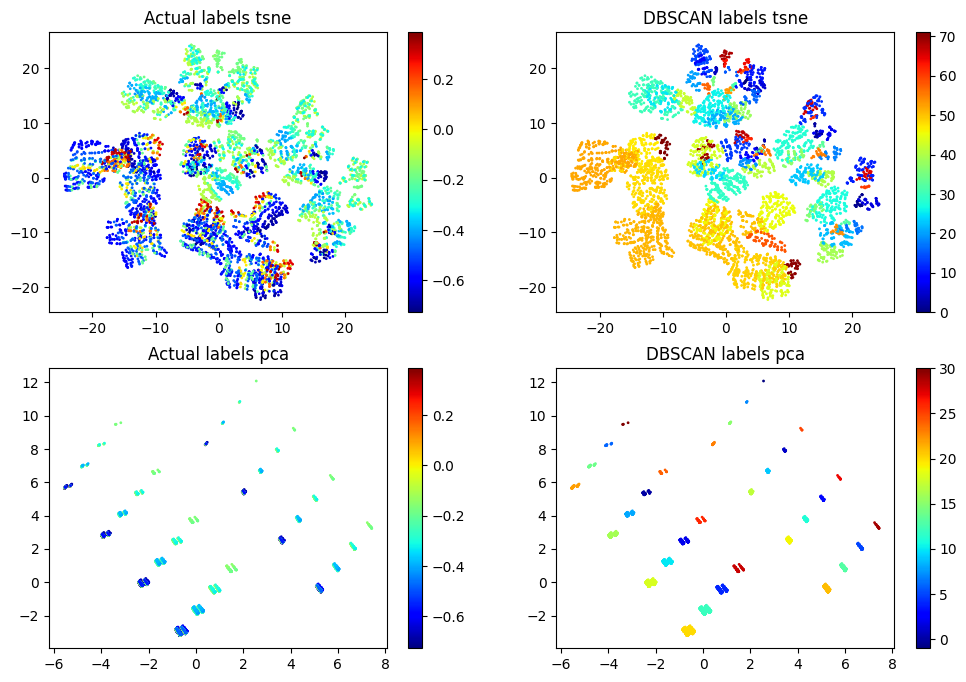

In [166]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y,s=1, cmap='jet')
plt.title("Actual labels tsne")
plt.colorbar()

plt.subplot(2,2,2)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=dbscan_tsne.labels_,s=1, cmap='jet')
plt.title("DBSCAN labels tsne")
plt.colorbar()

plt.subplot(2,2,3)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,s=1, cmap='jet')
plt.title("Actual labels pca")
plt.colorbar()

plt.subplot(2,2,4)
plt.scatter(X_pca[:,0],X_pca[:,1],c=dbscan_pca.labels_,s=1, cmap='jet')
plt.title("DBSCAN labels pca")
plt.colorbar()

plt.show()

In [167]:
labels_pca = dbscan_pca.labels_
silhouette_pca = silhouette_score(pca_df, labels_pca)
print(silhouette_pca)

0.9368607184050821


In [168]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_pca)) - (1 if -1 in labels_pca else 0)
n_noise_ = list(labels_pca).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 31
Estimated number of noise points: 1


In [169]:
labels_tsne = dbscan_tsne.labels_
silhouette_pca = silhouette_score(tsne_df, labels_tsne)
print(silhouette_pca)

0.48798758


In [170]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_tsne)) - (1 if -1 in labels_tsne else 0)
n_noise_ = list(labels_tsne).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 72
Estimated number of noise points: 0
